## Form train and test data

In [ ]:
import itertools
import nltk
from utilities import *
import re
import random
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
# File paths
txt_file_path = "../../final_all_GS_tagged_words_symbols_sentences.txt"
txt_file_path0 = "../../final_all_GS_tagged_words_symbols_sentences_0.txt"
txt_file_path1 = "../../korr_final_symbols_sentences.txt"
txt_file_path2 = "../../ukrlib_final_symbols_sentences.txt" 
txt_file_path10 = "../../korr_final_symbols_sentences_01.txt"
txt_file_path20 = "../../ukrlib_final_symbols_sentences_01.txt"
txt_file_path100 = "../../korr_final_symbols_sentences_00.txt"
txt_file_path200 = "../../ukrlib_final_symbols_sentences_00.txt"


data_path = "data/korr_ukrlib_data.pkl"
test_path = "data/brown_test_data.pkl"
x_pad_data_path = "data/korr_ukrlib_x_pad_data.pkl"
y_pad_data_path = "data/korr_ukrlib_y_pad_data.pkl"

# Sentence tokens
unknown_token = "_#unknown_"
sentence_start_token = "_#start_"
sentence_end_token = "_#end_"
padding_token = "_#padding_"

#Number of words to hold in vocabulary
vocabulary_size = 300000

In [3]:
with open(txt_file_path2, "rt") as infile:
    with open(txt_file_path20, "w+") as outfile:
        for sent in infile:
            if len(sent.split())>58:
                sep=';'
                separ='////'
                for k in sent.replace(sep, sep+separ).split(separ):
                    print(re.sub( r'^   |\n|^\t','',k), file=outfile)
            else:
                outfile.write(sent)
                
with open(txt_file_path1, "rt") as infile:
    with open(txt_file_path10, "w+") as outfile:
        for sent in infile:
            if len(sent.split())>58:
                sep=';'
                separ='////'
                for k in sent.replace(sep, sep+separ).split(separ):
                    print(re.sub( r'^   |\n|^\t','',k), file=outfile)
            else:
                outfile.write(sent)
with open(txt_file_path, "rt") as infile:
    with open(txt_file_path0, "w+") as outfile:
        for sent in infile:
            if len(sent.split())>58:
                sep=';'
                separ='////'
                for k in sent.replace(sep, sep+separ).split(separ):
                    print(re.sub( r'^   |\n|^\t','',k), file=outfile)
            else:
                outfile.write(sent)

In [4]:
with open(txt_file_path10, "rt") as infile:
    tokenized_sentences = [("%s %s %s" % (sentence_start_token, sentence, sentence_end_token)).split() for sentence in infile]

In [5]:
with open(txt_file_path20, "rt") as infile:
    tokenized_sentences += [("%s %s %s" % (sentence_start_token, sentence, sentence_end_token)).split() for sentence in infile]

In [6]:
with open(txt_file_path0, "rt") as infile:
    tokenized_sentences_test = [("%s %s %s" % (sentence_start_token, sentence, sentence_end_token)).split() for sentence in infile]

In [7]:
numwordsSE=0
numwords=0
for sent in tokenized_sentences:
    numwords+=len(sent)-2
    numwordsSE+=len(sent)    

#### Corpus

In [8]:
print ("Number of sentences ", len(tokenized_sentences))
print("Number of all tokens (with _#start_ _#end_ in each sentence) ", numwordsSE) 
print("Number of all tokens (without _#start_ _#end_ in each sentence) ", numwords) 

Number of sentences  14447614
Number of all tokens (with _#start_ _#end_ in each sentence)  270208921
Number of all tokens (without _#start_ _#end_ in each sentence)  241313693


In [9]:
lengths=[]
for sentence in tokenized_sentences:
    lengths.append(len(sentence))

(array([2.826231e+06, 6.102851e+06, 3.469397e+06, 1.356401e+06,
        4.429190e+05, 1.495680e+05, 7.244400e+04, 1.579000e+04,
        5.417000e+03, 2.564000e+03]),
 array([  0,  10,  20,  30,  40,  50,  60,  80, 100, 120, 140]),
 <a list of 10 Patch objects>)

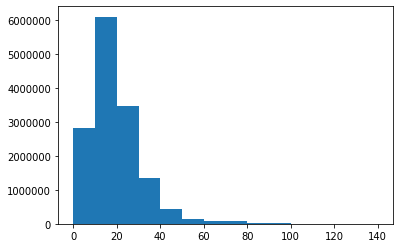

In [10]:
plt.hist(lengths, bins=[0,10,20,30,40,50,60,80,100,120,140])  # arguments are passed to np.histogram

#### Delete sentences longer then 60 tokens

In [11]:
tokenized_sentences_1 = [sentence for sentence in tokenized_sentences if (len(sentence) < 61 and len(sentence) > 3 ) ] 
tokenized_sentences=tokenized_sentences_1 

#### Train corpus

In [12]:
print ("Number of sentences ", len(tokenized_sentences))
print("Number of all tokens (with _#start_ _#end_ in each sentence) ", sum([len(sen) for sen in tokenized_sentences]) )
print("Number of all tokens (without _#start_ _#end_ in each sentence) ",  sum([len(sen)-2 for sen in tokenized_sentences])) 

Number of sentences  14335495
Number of all tokens (with _#start_ _#end_ in each sentence)  262598163
Number of all tokens (without _#start_ _#end_ in each sentence)  233927173


#### Test corpus

In [13]:
print ("Number of sentences ", len(tokenized_sentences_test))
print("Number of all tokens (with _#start_ _#end_ in each sentence) ", sum([len(sen) for sen in tokenized_sentences_test]) )
print("Number of all tokens (without _#start_ _#end_ in each sentence) ",  sum([len(sen)-2 for sen in tokenized_sentences_test])) 

Number of sentences  40382
Number of all tokens (with _#start_ _#end_ in each sentence)  812788
Number of all tokens (without _#start_ _#end_ in each sentence)  732024


#### Example of the longest sentence

In [14]:
print(max(tokenized_sentences, key=len))

['_#start_', 'Лідер', '"', 'нацболів', '"', 'Едуард', 'Лімонов', 'виступає', 'за', 'втручання', 'Росії', 'у', 'конфлікт', 'на', 'Донбасі', 'Лідер', 'забороненої', 'в', 'Росії', 'Націонал-більшовицької', 'партії', ',', 'що', 'нині', 'зібрав', 'своїх', 'прихильників', 'під', 'брендом', '"', 'Інша', 'Росія', '"', ',', 'письменник', 'Едуард', 'Лимонов', 'від', 'початку', 'конфлікту', 'в', 'Україні', 'повністю', 'підтримав', 'сепаратистські', 'настрої', 'на', 'Донбасі', 'і', 'регулярно', 'виступав', 'за', 'всебічне', 'втручання', 'Росії', 'в', 'цей', 'конфлікт', '.', '_#end_']


#### Count the word frequencies train

In [15]:
word_frequency = nltk.FreqDist(itertools.chain(*tokenized_sentences)) 

In [16]:
# Get the most common words and build index to word and word to index vectors
vocab = word_frequency.most_common(len(word_frequency.items()))
print("Found %d unique word tokens." % len(word_frequency.items()))

Found 2189477 unique word tokens.


#### Count the word frequencies test

In [17]:
word_frequency_test = nltk.FreqDist(itertools.chain(*tokenized_sentences_test)) 

In [18]:
# Get the most common words and build index to word and word to index vectors
vocab_test = word_frequency_test.most_common(len(word_frequency_test.items()))
print("Found %d unique word tokens." % len(word_frequency_test.items()))

Found 103337 unique word tokens.


#### Number of tokens in vocabulary that occured more then N times

In [19]:
print("5 times - ", len([i for i in vocab if i[1] > 5]))
print("11 times - ", len([i for i in vocab if i[1] > 11]))
print("14 times - ", len([i for i in vocab if i[1] > 14]))

5 times -  550437
11 times -  368345
14 times -  323726


#### OOV for the whole train vocabulary (sentences<60)

In [20]:
len(set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab]))

7535

#### OOV for the train vocabulary of 300 000 most frequent word

In [21]:
len(set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab[:300000]]))

24931

#### OOV for the train vocabulary of words that occured 15 and more times

In [22]:
len(set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab[:323623]]))

23630

#### Delete sentences longer then 60 tokens in test set

In [23]:
tokenized_sentences_test_1 = [sentence for sentence in tokenized_sentences_test if (len(sentence) < 61 and len(sentence) > 3 )] 
tokenized_sentences_test=tokenized_sentences_test_1 

In [24]:
print ("Number of sentences ", len(tokenized_sentences_test))
print("Number of all tokens (with _#start_ _#end_ in each sentence) ", sum([len(sen) for sen in tokenized_sentences_test]) )
print("Number of all tokens (without _#start_ _#end_ in each sentence) ",  sum([len(sen)-2 for sen in tokenized_sentences_test])) 

Number of sentences  39900
Number of all tokens (with _#start_ _#end_ in each sentence)  779001
Number of all tokens (without _#start_ _#end_ in each sentence)  699201


In [25]:
word_frequency_test = nltk.FreqDist(itertools.chain(*tokenized_sentences_test)) 
# Get the most common words and build index to word and word to index vectors
vocab_test = word_frequency_test.most_common(len(word_frequency_test.items()))
print("Found %d unique word tokens." % len(word_frequency_test.items()))

Found 100420 unique word tokens.


#### OOV for the whole train vocabulary (sentences<60)

In [26]:
len(set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab]))

7161

#### OOV for the train vocabulary of 300 000 most frequent word

In [27]:
len(set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab[:299999]]))

23826

#### OOV for the train vocabulary of words that occured 15 and more times

In [28]:
len(set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab[:323623]]))

22571

In [29]:
oov=set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab[:299999]])

#### Train vocabulary 300000

In [30]:
vocabulary = vocab[:299999]
len(vocabulary)

299999

In [31]:
vocab[0]

(',', 18621664)

In [32]:
# Generate word to index and index to words (Add the word not the frequency from our vocabulary data)
index_to_word = [x[0] for x in vocabulary]
index_to_word.insert(0, unknown_token)
#index_to_word.insert(0, padding_token)

In [33]:
index_to_word[0]
#index_to_word[1]

'_#unknown_'

In [34]:
# Dictionary of {word : index} pairs
word_to_index = dict([(word, i) for i, word in enumerate(index_to_word)])

#### Replace all words not in our vocabulary with the #unknown token

In [35]:
unknown=0
# Replace all words not in our vocabulary with the unknown token
for i, sentence in enumerate(tokenized_sentences):
    for j, word in enumerate(sentence):
        if word not in word_to_index:
            tokenized_sentences[i][j] = unknown_token
            unknown+=1

In [36]:
unknown

5145722

In [37]:
unknown_test=0
# RepB8bvjbx3mUQXnxB8bvjbx3mUQXnxlace all words not in our vocabulary with the unknown token
for i, sentence in enumerate(tokenized_sentences_test):
    for j, word in enumerate(sentence):
        if word not in word_to_index:
            tokenized_sentences_test[i][j] = unknown_token
            unknown_test+=1

In [38]:
vocabulary.append((unknown_token, unknown))
#vocabulary.append((padding_token, 0))

In [39]:
#print("Using vocabulary size %d." % vocabulary_size)
print("The least frequent word in our vocabulary is '%s' and appeared %d times." % (
    vocabulary[-2][0], vocabulary[-2][1]))
print("Example sentence after Pre-processing: '%s'" % tokenized_sentences[101258])

The least frequent word in our vocabulary is 'наяві' and appeared 17 times.
Example sentence after Pre-processing: '['_#start_', 'Як', 'вказують', 'експерти', ',', 'нині', 'основна', 'проблема', 'української', 'армії', '—', 'низький', 'рівень', 'грошового', 'забезпечення', 'та', 'відсутність', 'гарантій', 'соціальної', 'захищеності', '.', '_#end_']'


#### Form train data file

In [40]:
x_train = []
for sentence in tokenized_sentences:
    x = []
    for word in sentence:
        x.append(word_to_index[word])
    x_train.append(x)

In [41]:
random.shuffle(x_train)
len(x_train)

14335495

In [42]:
# Save data to file
data = dict(
    x_train=x_train,
    #y_train=y_train,
    word_to_index=word_to_index,
    index_to_word=index_to_word,
    vocabulary=vocabulary,
    num_sentences=len(x_train),
    max_input_len=len(max(x_train,key=len)))

In [43]:
print("Saving training data")
try:
    save_training_data(data_path, data)
except FileNotFoundError as err:
    print("Error saving data " + str(err))

Saving training data
Saved file training data to data/korr_ukrlib_data.pkl.


#### Form test data file

In [44]:
x_test = []
for sentence in tokenized_sentences_test:
    x = []
    for word in sentence:
        x.append(word_to_index[word])
    x_test.append(x)

In [45]:
random.shuffle(x_test)
test_data = dict(
    x_test=x_test,
    oov=oov)

In [46]:
print("Saving test data")
try:
    save_training_data(test_path, test_data)
except FileNotFoundError as err:
    print("Error saving data " + str(err))

Saving test data
Saved file training data to data/brown_test_data.pkl.


#### Chunks

In [47]:
"""
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]

x_train_new=[]
y_train_new=[]
for somelist in x_train:
    if len(somelist)>100:
        somelist=list(chunks(somelist,100))
        for nested in somelist:
            x_train_new.append(nested)
    else:
        x_train_new.append(somelist)
for somelist in y_train:
    if len(somelist)>100:
        somelist=list(chunks(somelist,100))
        for nested in somelist:
            y_train_new.append(nested)
    else:
        y_train_new.append(somelist) """      

'\ndef chunks(l, n):\n    # For item i in a range that is a length of l,\n    for i in range(0, len(l), n):\n        # Create an index range for l of n items:\n        yield l[i:i+n]\n\nx_train_new=[]\ny_train_new=[]\nfor somelist in x_train:\n    if len(somelist)>100:\n        somelist=list(chunks(somelist,100))\n        for nested in somelist:\n            x_train_new.append(nested)\n    else:\n        x_train_new.append(somelist)\nfor somelist in y_train:\n    if len(somelist)>100:\n        somelist=list(chunks(somelist,100))\n        for nested in somelist:\n            y_train_new.append(nested)\n    else:\n        y_train_new.append(somelist) '